### Are employers doing enough to address their employee's mental health?
    
    In analyzing mental health trends inside the tech industry, it is important to see whether not employers are doing enough to address their employees mental health needs. This survey gives us insight into that by asking the folliwing three questions:
    
    1. Do you know the options for mental health care available under your employer-provided health coverage?

    2. Does your employer offer resources to learn more about mental health disorders and options for seeking help?

    3. Does your employer offer resources to learn more about mental health disorders and options for seeking help?

    The first thing we did was count the  amount of yes , no , I don't know answers each surey take provided 0 being the worst and 3 being the best. 

      

    

In [33]:
import pandas as pd 
import matplotlib  as mp

In [180]:
file = 'Data/Survey_Data.csv'

Survey_Data = pd.read_csv(file)

Survey_Data.head()

,UserID,Age,Gender,Country,State/Territory,Do you know the options for mental health care available under your employer-provided health coverage?,Does your employer offer resources to learn more about mental health disorders and options for seeking help?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?"
0,1,37,Female,United States,Illinois,Did Not Answer,Did Not Answer,Did Not Answer
1,2,44,Male,United States,Indiana,Did Not Answer,Did Not Answer,Did Not Answer
2,3,32,Male,Canada,Not Applicable,Did Not Answer,Did Not Answer,Did Not Answer
3,4,31,Male,United Kingdom,Not Applicable,Did Not Answer,Did Not Answer,Did Not Answer
4,5,31,Male,United States,Texas,Did Not Answer,Did Not Answer,Did Not Answer


In [3]:
# Creat two columns 1) counts how many questions each user answered yes to 2) how many questions they answered no to. Aggregate these figures and create visualisations
# 0-1 would be bad and 3 would be good.
# Can also creat age bins. That could provide useful insight and could be a great visualisation. Maybe tech companies need to reach out to younger workers more so than older ones
# If we have a lot of 3s then maybe tech companies are doing a good job look after their employees health. If there is a lot of 1s then they have room to improve.
#



In [181]:
# Name questions 1 , 2 and 3 for ease of use.

Survey_Data = Survey_Data.rename(columns ={'Do you know the options for mental health care available under your employer-provided health coverage?' : 'Question 1',
                                            'Does your employer offer resources to learn more about mental health disorders and options for seeking help?': 'Question 2',
                                            'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?' : 'Question 3'})

In [183]:
Survey_Data = Survey_Data[(Survey_Data['Question 1'] != 'Did Not Answer') & (Survey_Data['Question 2'] != 'Did Not Answer') & (Survey_Data['Question 3'] != 'Did Not Answer') ]

In [184]:
Survey_Data["Yes Responses"] = Survey_Data.apply(lambda x: (x == 'Yes').sum(), axis=1)
Survey_Data["No Responses"] = Survey_Data.apply(lambda x: (x == 'No').sum(), axis=1)
Survey_Data["'I don't know' Responses"] = Survey_Data.apply(lambda x: (x == "I don't know").sum(), axis=1)

Survey_Data

<ipython-input-184-4aaf50c5cadd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Survey_Data["Yes Responses"] = Survey_Data.apply(lambda x: (x == 'Yes').sum(), axis=1)
<ipython-input-184-4aaf50c5cadd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Survey_Data["No Responses"] = Survey_Data.apply(lambda x: (x == 'No').sum(), axis=1)
<ipython-input-184-4aaf50c5cadd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,UserID,Age,Gender,Country,State/Territory,Question 1,Question 2,Question 3,Yes Responses,No Responses,'I don't know' Responses
1261,1262,29,Male,United States,Illinois,Yes,Yes,Yes,3,0,0
1264,1265,43,Female,United States,Illinois,Yes,No,No,1,2,0
1265,1266,42,Male,United Kingdom,Not Applicable,No,Yes,No,1,2,0
1266,1267,30,Male,United States,Tennessee,No,No,No,0,3,0
1267,1268,37,Female,United States,Virginia,Yes,Yes,No,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4211,4212,26,Female,Brazil,Not Applicable,No,No,No,0,3,0
4212,4213,31,Female,United States,California,No,No,No,0,3,0
4213,4214,27,Male,India,Not Applicable,No,I don't know,No,0,2,1
4216,4217,30,Female,India,Not Applicable,No,No,No,0,3,0


### How many 

In [187]:
yes = Survey_Data["Yes Responses"].value_counts()
no = Survey_Data["No Responses"].value_counts()
idk = Survey_Data["'I don't know' Responses"].value_counts()

df = pd.DataFrame({
                "Yes" : yes,
                "No"  : no,
                "I don't know" : idk
})


df["I don't know"] = df["I don't know"].fillna(value=0).astype('int')

df

,Yes,No,I don't know
0,980,383,1467
1,606,525,611
2,332,727,113
3,273,556,0


<AxesSubplot:xlabel='Responses', ylabel='Number of Respondents'>

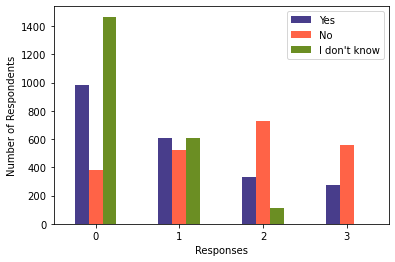

In [226]:
(df
    .plot(
    kind='bar',
    ylabel='Number of Respondents',
    xlabel='Responses',
    color=['darkslateblue' , 'tomato' , 'olivedrab'],
    rot=0
    ))
    

Here, each respondent's responses were aggregated to count how many times each respondent answered 'yes' , 'no' or 'I don't know' to a question. For example, if a respondent answered 'yes' to each question then they would be assigned a 3 and if they answered 'yes' to one question they would be assigned a 1. The graph shows a couple of interesting trends. First, there was just below 1000 respondents who didn't answer yes to any of the questions which more than doubled the amount of respondents who didn't answer no to any of the questions. Second, there were significantly more respondents who answered no to atleast two of the questions as opposed to answering yes to atleaast two questions. Finally, there were way more respondents who answered no to all three questions. In an ideal world for a company, the trend would be the opposite where there are way more yes responses than no responses. This shows that tech companies can do more to help their employees with issues related to mental health but it's important to look at the responses for each individual question in order to make an accurate judgement of how well employters are handling their employees' mental health



In [225]:
question_1= Survey_Data['Question 1'].value_counts()
question_2 = Survey_Data['Question 2'].value_counts()
question_3 = Survey_Data['Question 3'].value_counts()

questions_df = pd.DataFrame({
    'Question 1': question_1,
    'Question 2': question_2,
    'Question 3': question_3
})

questions_df['Question 1'] = questions_df['Question 1'].fillna(value=0 ).astype('int')

questions_df.sort_index(ascending=False)

,Question 1,Question 2,Question 3
Yes,869,668,552
No,1322,899,1426
I don't know,0,624,213


<AxesSubplot:title={'center':'Do you know the options for mental health care available under your employer-provided health coverage?'}, ylabel='Number of Responses'>

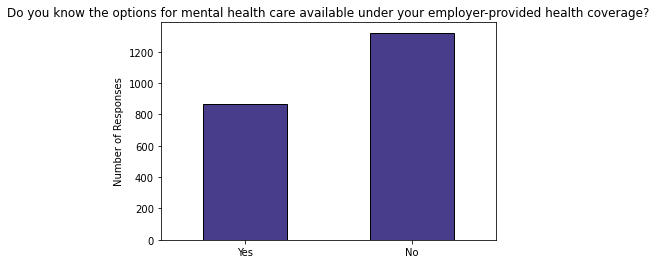

In [220]:
(question_1
        .sort_index(ascending=False)
        .plot(
            kind='bar' , 
            title='Do you know the options for mental health care available under your employer-provided health coverage?' ,
            rot=0,
            color="darkslateblue",
            edgecolor='black',
            ylabel='Number of Responses'))

This graph shows that there are more respondents that do not know their options from their healthcare plan than not. Companies can be doing more to tell their employees what benefits they have or atleast remind them to atleast look at what mental healthcare optiosn are available  to them. Granted employees should know or atleast want to look into all of the benefits that they have under their healthcare plan. 

<AxesSubplot:title={'center':'Does your employer offer resources to learn more about mental health disorders and options for seeking help?'}, ylabel='Number of Responses'>

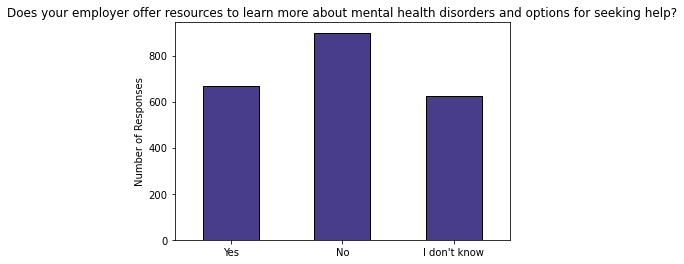

In [221]:
(question_2
        .sort_index(ascending=False)
        .plot(
            kind='bar' , 
            title='Does your employer offer resources to learn more about mental health disorders and options for seeking help?' ,
            rot=0,
            facecolor="darkslateblue",
            edgecolor='black',
            ylabel='Number of Responses'))

This graph shows how people responded to the question: 'Does your employer offer resources to learn more about mental health disorders and options for seeking help?'. Again, the same trend shows that more people answered no than yes although it is much closer (only a gap of 200 to 300). This graph does show two causes for concern. First, there are tech companies that are not offering resources to learn about mental health or options for seeking help. Second, a lot of respondents answered 'I don't know'. If companies are providing these resources then it is possible they are not doing a good enough job communicating with their employees about them. 

<AxesSubplot:title={'center':'Has your employer ever formally discussed mental health?'}, ylabel='Number of Responses'>

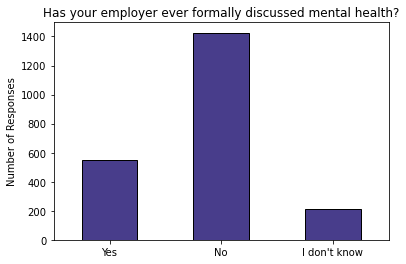

In [222]:
(question_3
        .sort_index(ascending=False)
        .plot(
            kind='bar' , 
            title='Has your employer ever formally discussed mental health?' ,
            rot=0,
            facecolor="darkslateblue",
            edgecolor='black',
            ylabel='Number of Responses'))

This graph shows that employers are overwhemingly failing at communicating with their employees about mental health. Combining this insight with the insights above makes it clear employers are not doing enough to assist their employees with their mental health needs. It seems like they are several companies that do not have resources or programs to help their employees to begin with. The biggest issue seems to be though that there is a lack of communication on the topic. Companies need to either open up or vastly improve dialogue on the subject.